In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the hours from 0 to 24
hours = np.arange(0, 24, 1)

In [3]:
# Generate the consumption for weekdays as a curve with a peak
weekday_peak_times = np.array([6, 20])
weekday_peak_consumption = 1500
consumption_weekday = np.sin(((hours - weekday_peak_times[0]) / (weekday_peak_times[1] - weekday_peak_times[0])) * np.pi) * (weekday_peak_consumption - 700) + 700
consumption_weekday[hours < weekday_peak_times[0]] = 700
consumption_weekday[hours > weekday_peak_times[1]] = 700

In [4]:
# Weekend consumption is constant
consumption_weekend = np.full_like(hours, 790)

In [5]:
# Generate the PV production as a curve
pv_production_high_start = 6
pv_production_high_end = 20
pv_production_high = np.clip(np.sin(((hours - pv_production_high_start) / (pv_production_high_end - pv_production_high_start)) * np.pi) * 1000, 0, 1000)
pv_production_low = np.clip(np.sin(((hours - pv_production_high_start) / (pv_production_high_end - pv_production_high_start)) * np.pi) * 420, 0, 420)


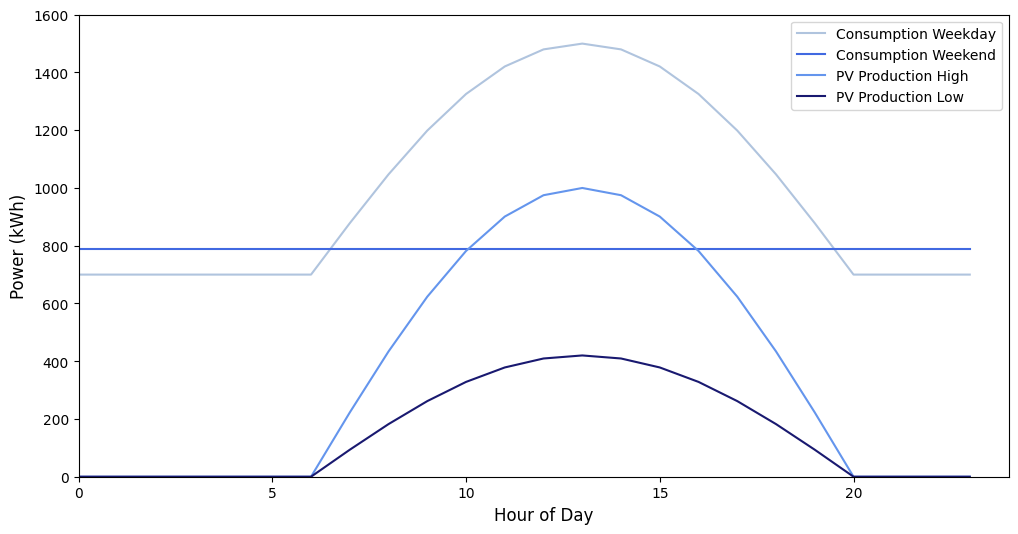

In [13]:
# Create the plot
plt.figure(figsize=(12, 6), facecolor='white')

# Set the x and y-axis limits to start at zero
plt.xlim(0, 24)
plt.ylim(0, 1600)

plt.grid(False)

# Plot the data
plt.plot(hours, consumption_weekday, label='Consumption Weekday', color='lightsteelblue')
plt.plot(hours, consumption_weekend, label='Consumption Weekend', color='royalblue')
plt.plot(hours, pv_production_high, label='PV Production High', color='cornflowerblue')
plt.plot(hours, pv_production_low, label='PV Production Low', color='midnightblue')

# Add title and labels
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Power (kWh)', fontsize=12)

# Set the y-axis limit
plt.ylim(0, 1600)

plt.legend()

# Save the plot to a file
plt.savefig('Users/ellareuter/Downloads/daily_profile_august.png', bbox_inches='tight')

# Show the plot
plt.show()